# Stacjonarność 

In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
%matplotlib inline

Chcemy umieć modelować szeregi aby dobrze odwzorować ich zachowanie i mieć  wiarygodne przewidywania wartości tego szeregu w przyszłości. Większość modeli które istnieją dotyczą szeregów stacjonarnych, więc na początku nauczymy się badać stacjonarność szeregu

**Stacjonarność w szerszym sensie**

- stała w czasie wartość oczekiwana $\mathbb{E}(y_t) = \mu,$
- stała w czasie wariancja $\text{Var}(y_t) = \sigma^2 < \infty,$
- kowariancja zależna od przesunięcia $h$ (nie od czasu) $\text{Cov}(y_t, y_{t+h}) = \mathbb{E}(y_t - \mu)(y_{t+h} - \mu) = \lambda_h.$


W celach praktycznych aby sprawdzić stacjonarność szeregu możemy użyć:
1. technik wizualizacyjnych
    - **średniej ruchomej**,
    - **ruchomej wariancji**
2. **testu Dickeya-Fullera** - jeden z testów statystycznych weryfikujących stacjonarność szeregu, gdzie hipoteza zerowa testu Dickeya-Fullera zakłada, że szereg jest niestacjonarny.

## Zadanie - biały szum
Wygeneruj 100-elementowy *biały szum*, a następnie:
- narysuj wykres tego szeregu,
- nanieść na powyższy wykres,
    - wykres średniej ruchomej o długości 12 (`pandas.Series.rolling`),
    - wykres ruchomej wariancji o długości 12 (`pandas.Series.rolling`),
- narysuj wykres autokorelacji tego szeregu
- wykonaj test Dickeya-Fullera na poziomie istotności 0.05.

**Biały szum** (ang. **white noise**):
$$
    y_t = \varepsilon_t,
$$
gdzie $\varepsilon_t \sim \mathcal{N}(0, \sigma)$.


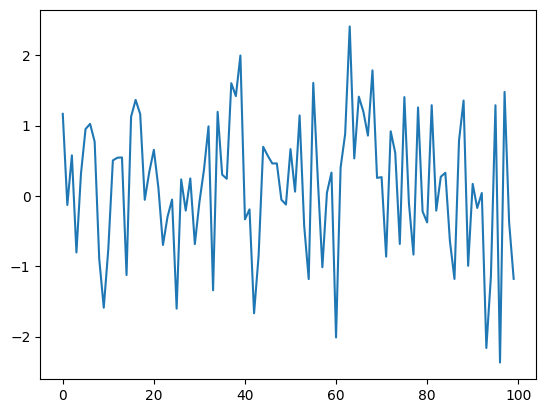

In [2]:
sigma = 1

white_noise = np.random.normal(0, sigma, 100)
plt.plot(white_noise)

In [3]:
white_noise

array([ 1.16743077, -0.12884675,  0.57724345, -0.80392941,  0.31969118,
        0.95088335,  1.02484139,  0.77160174, -0.89227327, -1.58962358,
       -0.75438211,  0.50479729,  0.54387286,  0.54711872, -1.12516809,
        1.12733402,  1.36558301,  1.16446941, -0.0548041 ,  0.34332071,
        0.65530087,  0.11229364, -0.69723033, -0.29638931, -0.05188089,
       -1.60279912,  0.23426302, -0.20822986,  0.24865772, -0.68493406,
       -0.08966839,  0.37237967,  0.99018587, -1.34180914,  1.1956234 ,
        0.30252541,  0.24368715,  1.60350705,  1.42010081,  1.99694721,
       -0.33314069, -0.190983  , -1.66878156, -0.84809676,  0.69834159,
        0.57229108,  0.46223844,  0.46211175, -0.05381546, -0.12207807,
        0.66593304,  0.06112177,  1.14516973, -0.42117659, -1.18243407,
        1.60739639,  0.23528161, -1.01454768,  0.04549276,  0.33208455,
       -2.01255701,  0.40329715,  0.88062936,  2.40996287,  0.53350292,
        1.41202418,  1.19857327,  0.85810509,  1.78566259,  0.25

In [4]:
white_noise = pd.Series(white_noise)
white_noise

0     1.167431
1    -0.128847
2     0.577243
3    -0.803929
4     0.319691
        ...   
95    1.289587
96   -2.368473
97    1.479144
98   -0.375719
99   -1.178652
Length: 100, dtype: float64

In [5]:
wn_rolling_mean = white_noise.rolling(12).mean() 
wn_rolling_var = white_noise.rolling(12).var()
# bierzemy 12 obserwacji okienko 1,12 : 2,13 3,14 itd
# jak dobieramy "okno"? zeby nie bylo ani za duze ani za male
# 

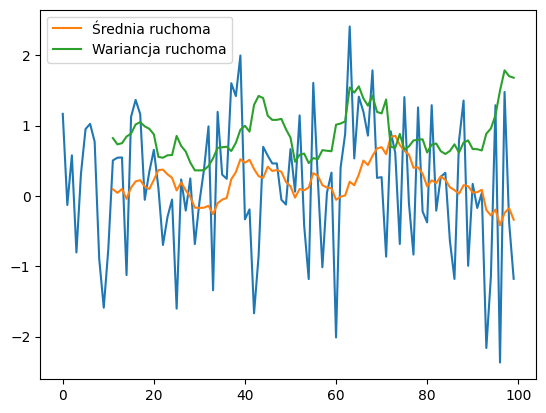

In [7]:
plt.plot(white_noise)
plt.plot(wn_rolling_mean, label = 'Średnia ruchoma')
plt.plot(wn_rolling_var, label = 'Wariancja ruchoma')
plt.legend()
plt.show()

In [ ]:
# jesli srednia ruchoma rosnie to mamy trend
# jesli jest stabilna, jak tutaj, to trendu nie mamy

# sprawdzenie stabilnosci wariancji


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

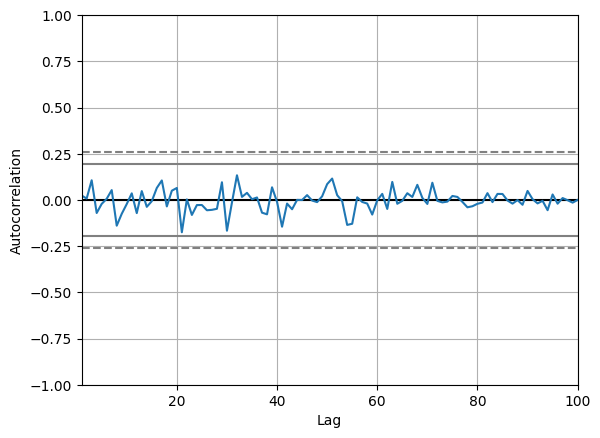

In [8]:
pd.plotting.autocorrelation_plot(white_noise)
# wszystko siedzi w pasie, nic nie wystaje poza

In [ ]:
# modele Garge i Arge? to dodatkowe info

In [9]:
df_test = adfuller(white_noise)
df_test

(np.float64(-9.570391969237708),
 np.float64(2.2966130974453857e-16),
 0,
 99,
 {'1%': np.float64(-3.498198082189098),
  '5%': np.float64(-2.891208211860468),
  '10%': np.float64(-2.5825959973472097)},
 np.float64(246.71170774085672))

## Zadanie - błądzenie losowe
Wygeneruj 100-elementowy szereg czasowy typu *błądzenie losowe*, a następnie:
- narysuj wykres tego szeregu,
- nanieść na powyższy wykres,
    - wykres średniej ruchomej o długości 12,
    - wykres ruchomej wariancji o długości 12,
- narysuj wykres autokorelacji tego szeregu
- wykonaj test Dickeya-Fullera na poziomie istotności 0.05.

**Błądzenie losowe** (ang.*random walk*):
$$
y_t = y_{t-1} + \varepsilon_t = y_0 + \sum_{i=1}^{t}\varepsilon_i,
$$
gdzie $y_0 = a = \text{const}$ i $\varepsilon_t \sim \mathcal{N}(0, \sigma)$.

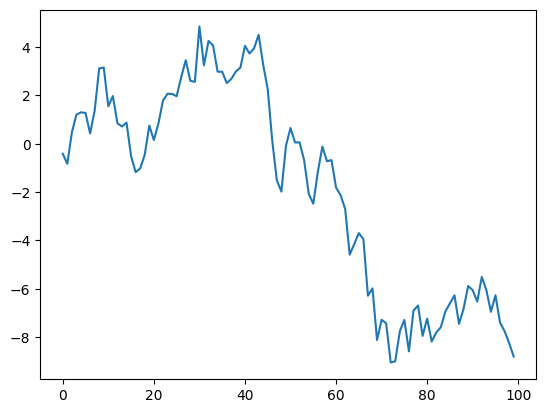

In [10]:
# zakladam, ze y0=0
e = np.random.normal(0, 1, 100)
random_walk = np.cumsum(e)

plt.plot(random_walk)

In [ ]:
# nie jest stacjonarny na pewno
# jest niestabilny, bo bardo mocno mzienia sie w zaleznosci od losowosci

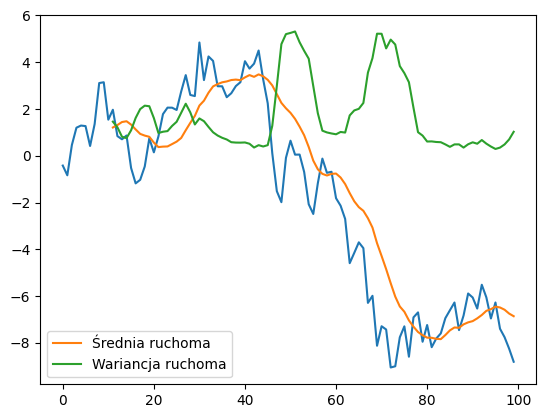

In [11]:
random_walk = pd.Series(random_walk)

rw_rolling_mean = random_walk.rolling(12).mean()
rw_rolling_var = random_walk.rolling(12).var()

plt.plot(random_walk)
plt.plot(rw_rolling_mean, label = 'Średnia ruchoma')
plt.plot(rw_rolling_var, label = 'Wariancja ruchoma')
plt.legend()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

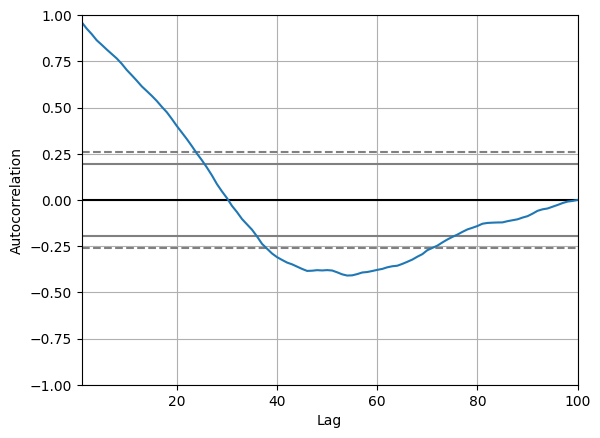

In [12]:
pd.plotting.autocorrelation_plot(random_walk)

In [13]:
df_test = adfuller(random_walk)
df_test

(np.float64(-0.5008360083815416),
 np.float64(0.89185325186243),
 0,
 99,
 {'1%': np.float64(-3.498198082189098),
  '5%': np.float64(-2.891208211860468),
  '10%': np.float64(-2.5825959973472097)},
 np.float64(238.34221806574524))

## Zadanie
Napisz funkcję `check_time_series_stationary`, która:
- narysuje wykres tego szeregu,
- naniesie na powyższy wykres,
    - wykres średniej ruchomej zadanej długości,
    - wykres ruchomej wariancji zadanej długości,
- narysuje wykres autokorelacji tego szeregu,
- wykona test Dickeya-Fullera, zwróci wartość statystyki testowej oraz $p$-wartość.

In [14]:
#funkcja wyrzuca wartość statystyki i p-wartość testu Dickeya-Fullera, rysuje wykreś średniej ruchomej i wariancji ruchomej i wykres autokorelacji
def check_time_series_stationary(y, rolling_len = 12):
    
    y = pd.Series(y)
    
    df_test = adfuller(y)
    
    if df_test[1] < 0.05:
        print('Szereg jest stacjonarny')
    else:
        print('Szereg jest niestacjonarny')
    
    print("{0:^32s}".format("Dickey-Fuller Test"))
    print("-"*32+"\n")
    
    print("{0:<20s}: {1:>10.4f}".format('Test Statistic', df_test[0]))
    print("{0:<20s}: {1:>10.4f}".format('p-value', df_test[1]))
    print("-"*32+"\n")
    
    rolling_mean = y.rolling(rolling_len).mean()
    rolling_var = y.rolling(rolling_len).var()

    plt.plot(y)
    plt.plot(rolling_mean, label="Rolling mean")
    plt.plot(rolling_var, label="Rolling var")
    plt.legend()
    plt.show()
    
    print("{0:^32s}".format("Autocorrelation plot"))
    print("-"*32+"\n")
    pd.plotting.autocorrelation_plot(y)
    plt.show()

## ***Zadanie - parametr $\varphi$
Idea **testu Dickey-Fullera** opiera się na modelu autokorelacji pierwszego rzędu następującej
postaci: 
$$ y_t = \varphi y_{t-1} + \varepsilon_t, $$
gdzie $\varphi$ - parametr modelu autoregresji i $\varepsilon_t$ - składnik losowy o własnościach białego szumu.

Wygeneruj szeregi czasowe $y_t$ dla następujących wartości $\varphi \in \{0.1, 0.25, 0.5, 0.75, 0.9\}$, a następnie zbadaj ich stacjonarność.

            Rho=0.1             
--------------------------------

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -5.1892
p-value             :     0.0000
--------------------------------



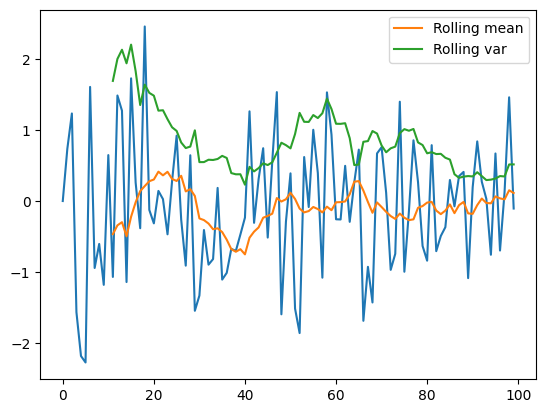

      Autocorrelation plot      
--------------------------------



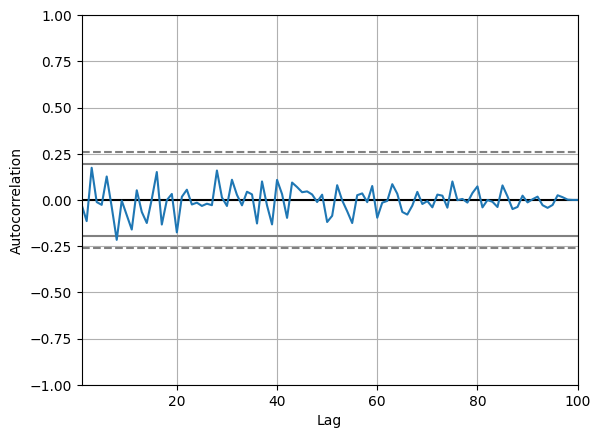

            Rho=0.25            
--------------------------------

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -4.7438
p-value             :     0.0001
--------------------------------



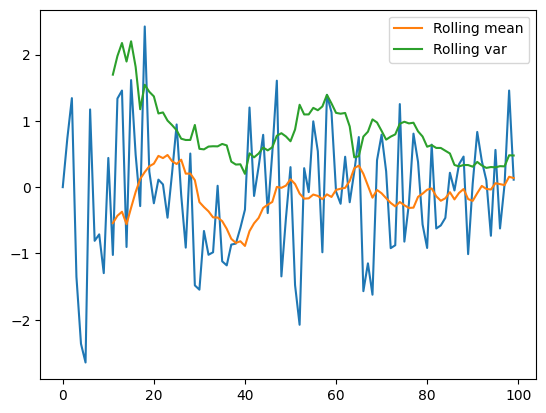

      Autocorrelation plot      
--------------------------------



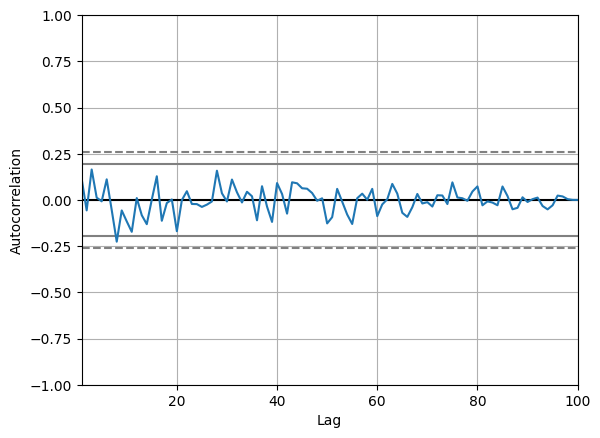

            Rho=0.5             
--------------------------------

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -3.7468
p-value             :     0.0035
--------------------------------



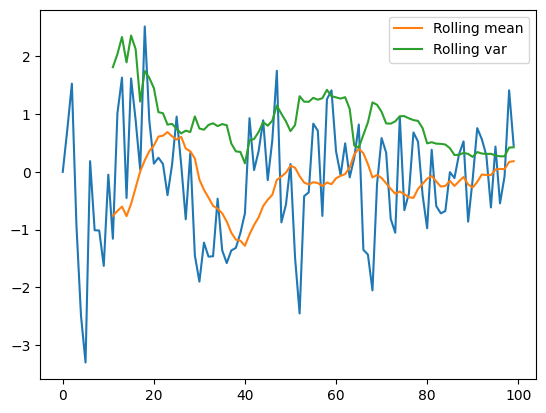

      Autocorrelation plot      
--------------------------------



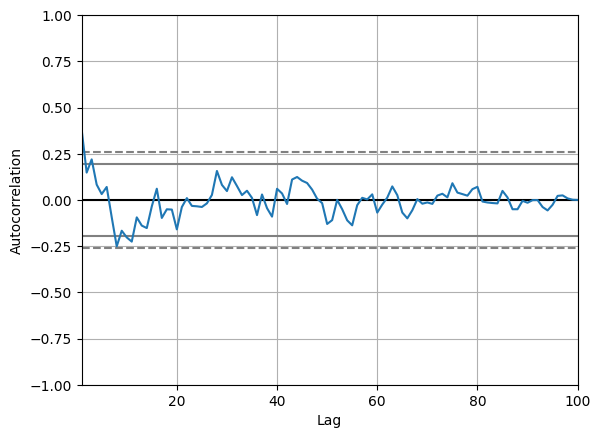

            Rho=0.75            
--------------------------------

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -3.2442
p-value             :     0.0176
--------------------------------



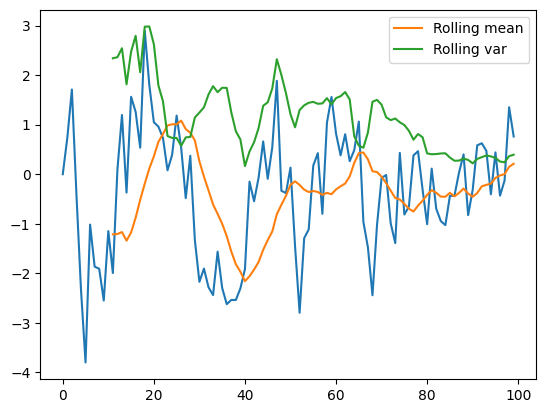

      Autocorrelation plot      
--------------------------------



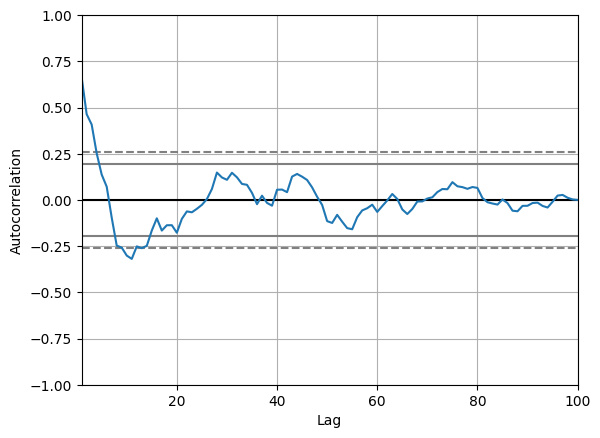

            Rho=0.9             
--------------------------------

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -2.9598
p-value             :     0.0388
--------------------------------



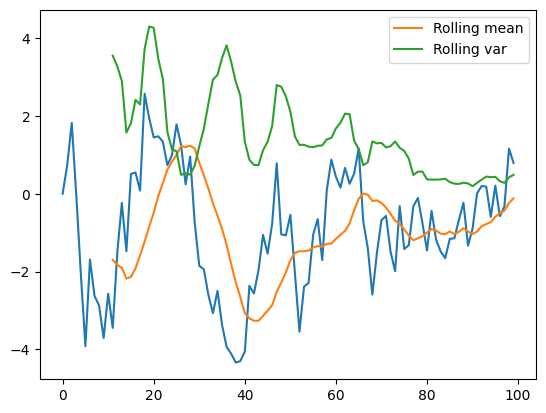

      Autocorrelation plot      
--------------------------------



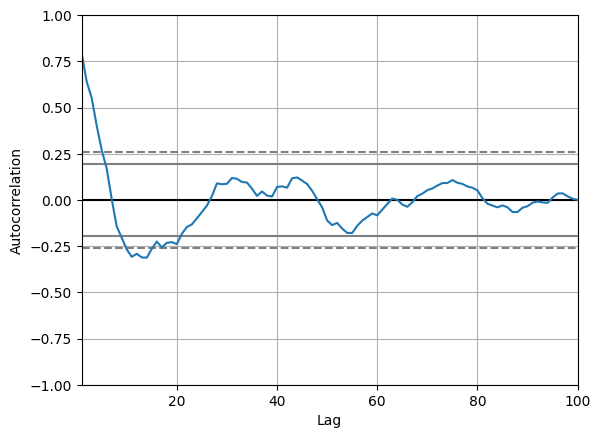

In [15]:
n = 100
e = np.random.normal(0, 1, 100)

for q in (0.1, 0.25, 0.5, 0.75, 0.9):
    print("{0:^32s}".format("Rho=" + str(q)))
    print("-"*32+"\n")
    y = np.zeros(n)
    for i in range(1, n):
        y[i] = q * y[i-1] + e[i]
    check_time_series_stationary(y)

## Zadanie - `a10`
Wczytaj dane `a10.csv` opisujące miesięczną sprzedaż leków przeciwcukrzycowych w Australii w latach 1992–2008, a następnie zbadaj stacjonarność tego szeregu.

In [16]:
a10 = pd.read_csv('a10.csv', parse_dates=['date'], index_col='date')
a10.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


Szereg jest niestacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :     3.1452
p-value             :     1.0000
--------------------------------



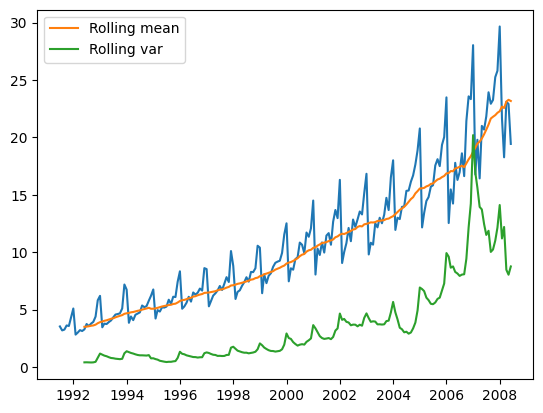

      Autocorrelation plot      
--------------------------------



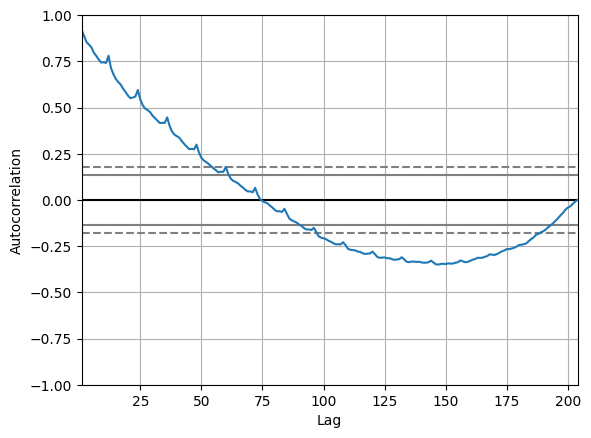

In [17]:
check_time_series_stationary(a10.value)

## Zadanie - `daily-total-female-births`
Wczytaj dane `daily-total-female-births.csv` przedstawiające całkowitą liczbę urodzeń kobiet zarejestrowanych w Kalifornii w USA w 1959 roku, a następnie zbadaj stacjonarność tego szeregu.

In [18]:
daily_total_female_births = pd.read_csv('daily-total-female-births.csv', 
                 parse_dates=['Date'], index_col='Date')
daily_total_female_births.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -4.8083
p-value             :     0.0001
--------------------------------



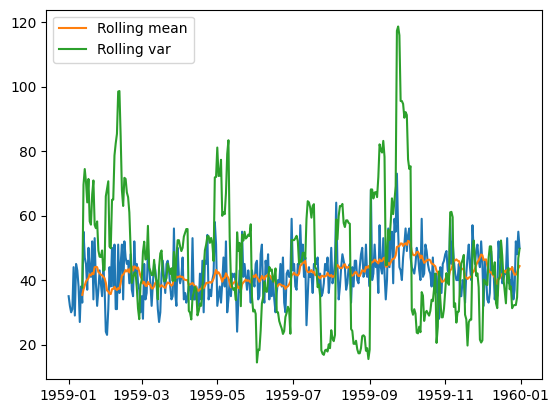

      Autocorrelation plot      
--------------------------------



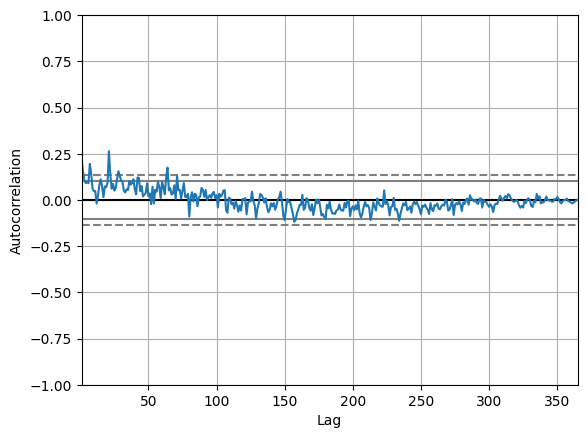

In [19]:
check_time_series_stationary(daily_total_female_births.Births)

In [ ]:
# srednia w miare gladka
# wariancja - powstal pewien pik, jest losowy, idzie stabilnie

## Zadanie - `southern`
Wczytaj dane `southern.csv`, a następnie zbadaj stacjonarność tego szeregu.

In [20]:
southern = pd.read_csv('southern.csv', parse_dates=['Date'], index_col='Date')
southern.head()

,Southern
Date,
1955-01-01,-0.7
1955-02-01,1.3
1955-03-01,0.1
1955-04-01,-0.9
1955-05-01,0.8


In [22]:
def plot_time_series(t, val, title="", xlabel='Data', ylabel='Wartość', dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(t, val, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

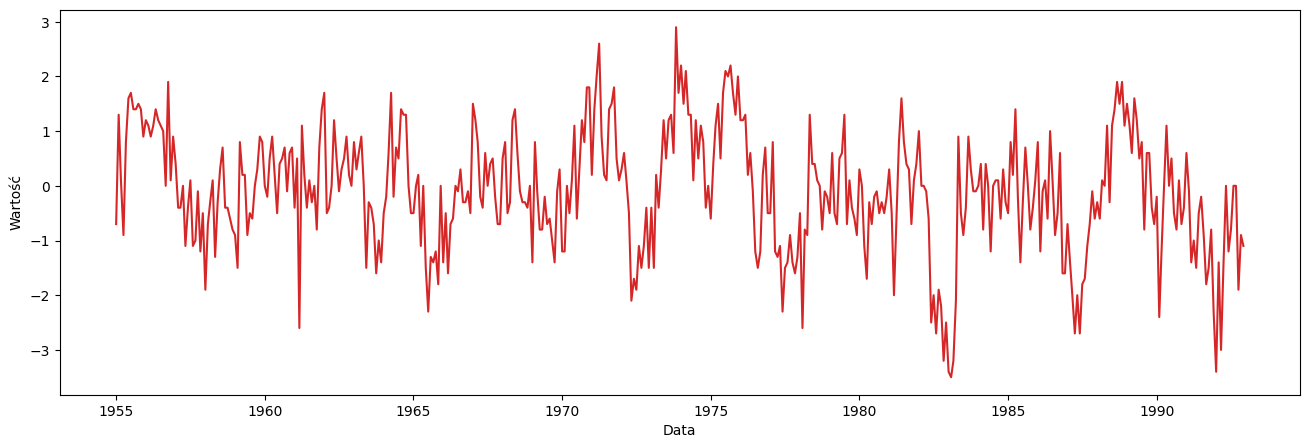

In [23]:
# sprawdzenie czy nie ma trendu
plot_time_series(southern.index, southern.values)

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -6.1813
p-value             :     0.0000
--------------------------------



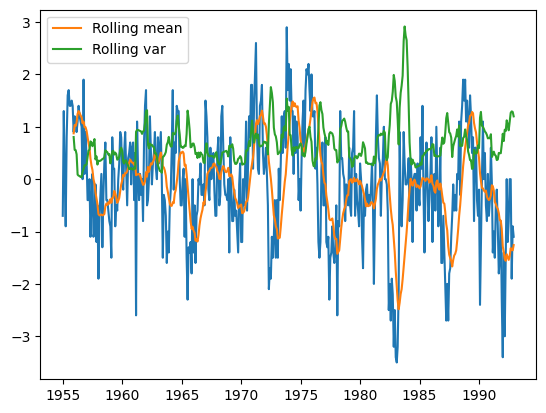

      Autocorrelation plot      
--------------------------------



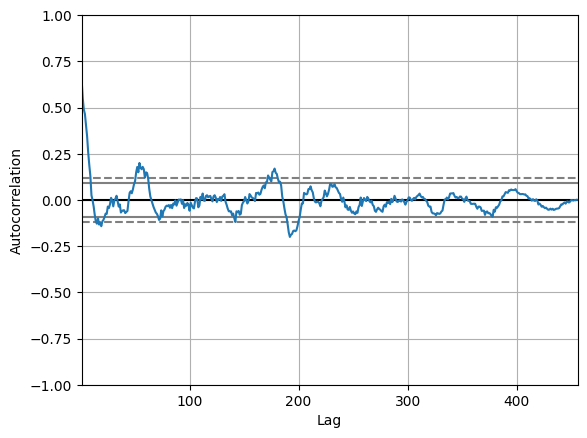

In [21]:
check_time_series_stationary(southern.Southern)

In [ ]:
# szereg w ktorym ciezko stwierdzic
# sredni trzyma poziom, jest stabilna 
# wariancja stabilna
# autokorelacja -> 

# najlepiej potraktowac jako stacjonarny, dopasowac do tych gorek dolkow z ayutokorelacji
# bierzemy prawdziwe wartosci szeregu, zamodelowane wartosci szeregu 
# po odjeciu ich od siebie powinien nam wyjsc bialy szum
